In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [8]:
print(f'shape of mnist: {X_train.shape[1]} * {X_train.shape[2]}')
print(f'num of labels: {len(set(y_train))}')

shape of mnist: 28 * 28
num of labels: 10


In [10]:
# 정규화

X_train, X_test = X_train / 255.0, X_test / 255.0

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)


In [11]:
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)


In [19]:
# 모델 설계

model = models.Sequential([
    layers.Input(shape = (28, 28, 1)), # input
    layers.Conv2D(32, kernel_size=3, activation ='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax') # output
])

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(X_train, y_train, batch_size=16, epochs=5, validation_split=0.2)

Epoch 1/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 53s 17ms/step - accuracy: 0.9043 - loss: 0.3084 - val_accuracy: 0.9835 - val_loss: 0.0528
Epoch 2/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 82s 17ms/step - accuracy: 0.9831 - loss: 0.0507 - val_accuracy: 0.9826 - val_loss: 0.0589
Epoch 3/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 82s 17ms/step - accuracy: 0.9901 - loss: 0.0326 - val_accuracy: 0.9878 - val_loss: 0.0430
Epoch 4/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 50s 17ms/step - accuracy: 0.9929 - loss: 0.0219 - val_accuracy: 0.9876 - val_loss: 0.0446
Epoch 5/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 80s 16ms/step - accuracy: 0.9952 - loss: 0.0162 - val_accuracy: 0.9887 - val_loss: 0.0416


In [22]:
loss, acc = model.evaluate(X_test, y_test)
print(f'test loss and acc : {loss, acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9881 - loss: 0.0382
test loss and acc : (0.03188428655266762, 0.9902999997138977)


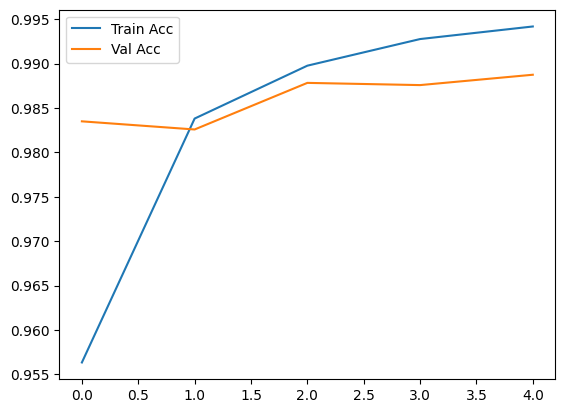

In [23]:
# 시각화
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()